# ***Investigación Corta III***

El objetivo consiste en elegir un conjunto de datos de baja-mediana complejidad y aplicarle algunos algoritmos supervisados de su elección, de la siguiente forma:

    -Una vez definida la ruta de acción a partir de sus datos y el tipo de problema a atacar (predicción
     o clasificación), debe aplicar 3 métodos de los vistos en clase, haciendo el análisis completo de los
     resultados que obtenga y modificando los hiper-parámetros de acuerdo a su problema particular. De
     ser necesario un pre-procesado, debe llevarlo a cabo.

    -Ejecutar el mismo análisis anterior pero esta vez para un método de ensamble que no se haya visto en
     clase.

    -Explique en que consisten los métodos de ensamble y cuáles son sus principales caracteríticas.
    
    -No olvide el análisis cientíco que se espera de esta tarea, justifique en todo momento los resultados
     y haga un buen uso de la Notebook.

se hace uso del dataset "
Breast Cancer Data Set", el cual se puede obtener y detallar en este sitio: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer

Primeramente procedemos a cargar las librerias necesarias:

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline

Se procede a cargar el archivo csv que contiene la data:

In [6]:
breast_cancer = pd.read_csv("breast-cancer.data")

Visualizamos las primeras lineas con el fin de tener una primera perspectiva de como se ven los datos

In [7]:
breast_cancer.head

<bound method NDFrame.head of      no-recurrence-events  30-39  premeno  30-34  0-2  no  3   left  \
0    no-recurrence-events  40-49  premeno  20-24  0-2  no  2  right   
1    no-recurrence-events  40-49  premeno  20-24  0-2  no  2   left   
2    no-recurrence-events  60-69     ge40  15-19  0-2  no  2  right   
3    no-recurrence-events  40-49  premeno    0-4  0-2  no  2  right   
4    no-recurrence-events  60-69     ge40  15-19  0-2  no  2   left   
..                    ...    ...      ...    ...  ...  .. ..    ...   
280     recurrence-events  30-39  premeno  30-34  0-2  no  2   left   
281     recurrence-events  30-39  premeno  20-24  0-2  no  3   left   
282     recurrence-events  60-69     ge40  20-24  0-2  no  1  right   
283     recurrence-events  40-49     ge40  30-34  3-5  no  3   left   
284     recurrence-events  50-59     ge40  30-34  3-5  no  3   left   

      left_low no.1  
0     right_up   no  
1     left_low   no  
2      left_up   no  
3    right_low   no  
4     l

Agregando encabezados de las columnas, primeramente se crea un arreglo con los  nombres de las columnas para despues colocarlo en la tabla de datos

In [8]:
column_names =['Class', 'age', 'menopause', 'tumor size', 'inv nodes', 'node caps',
       'deg maling', 'breast', 'breast quad', 'irradiat']

In [9]:
breast_cancer = pd.read_csv("breast-cancer.data", names = column_names)

Se presenta ahora la visualización de la data con las primeras lineas con  su respectivo encabezado

In [10]:
breast_cancer.head()

,Class,age,menopause,tumor size,inv nodes,node caps,deg maling,breast,breast quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


## ***Analisis Exploratorio de Datos***

Primeramente procedemos a analizar el tipo de datos de los atributos 

In [11]:
breast_cancer.dtypes

Class          object
age            object
menopause      object
tumor size     object
inv nodes      object
node caps      object
deg maling      int64
breast         object
breast quad    object
irradiat       object
dtype: object

Notese que realmente el unico dato númerico(en este caso entero) que se tiene es el grado de malignidad del tumor, sin emnbargo en este punto no se sabe con certeza si los datos son categoricos, para ello se procedera a estudiar con comandos unique and describe, cada atributo 

In [12]:
pd.unique(breast_cancer['Class'])

array(['no-recurrence-events', 'recurrence-events'], dtype=object)

In [13]:
breast_cancer['Class'].describe()

count                      286
unique                       2
top       no-recurrence-events
freq                       201
Name: Class, dtype: object

In [14]:
pd.unique(breast_cancer['age'])

array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object)

Notese que el rango de edades va desde 20 hasta 79, sin embargo los datos no pueden escribirse como un numero exacto, por ende son datos categoricos

In [15]:
breast_cancer['age'].describe()

count       286
unique        6
top       50-59
freq         96
Name: age, dtype: object

In [16]:
pd.unique(breast_cancer['menopause'])

array(['premeno', 'ge40', 'lt40'], dtype=object)

In [17]:
breast_cancer['menopause'].describe()

count         286
unique          3
top       premeno
freq          150
Name: menopause, dtype: object

El atributo menopause tambien corresponde a datos de tipo categorico 

In [18]:
pd.unique(breast_cancer['tumor size'])

array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14',
       '40-44', '35-39', '5-9', '45-49'], dtype=object)

Notese que el rango de tamaños de tumor va desde 0 hasta 54 sin embargo tambien es un atributo categorico

In [19]:
pd.unique(breast_cancer['inv nodes'])

array(['0-2', '6-8', '9-11', '3-5', '15-17', '12-14', '24-26'],
      dtype=object)

In [20]:
breast_cancer['inv nodes'].describe()

count     286
unique      7
top       0-2
freq      213
Name: inv nodes, dtype: object

Aca se presenta un atributo categorico binario

In [21]:
breast_cancer['node caps'].describe()

count     286
unique      3
top        no
freq      222
Name: node caps, dtype: object

In [22]:
pd.unique(breast_cancer['node caps'])

array(['no', 'yes', '?'], dtype=object)

***Aca se encontraron valores de ? *** Este es un tipo  de categoria binaria, sin embargo presenta valores faltantes, estos datos se deben trabajar antes de ser utilizados, esto realizara en una sección posterior 

In [23]:
breast_cancer['deg maling'].describe()

count    286.000000
mean       2.048951
std        0.738217
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: deg maling, dtype: float64

In [24]:
pd.unique(breast_cancer['deg maling'])

array([3, 2, 1], dtype=int64)

  El grado de malignidad realmente es un atributo categorico y no variable por tanto los datos estadisticos obtenidos con el comando describe realmente no aportan información valiosa

In [25]:
breast_cancer['breast'].describe()

count      286
unique       2
top       left
freq       152
Name: breast, dtype: object

In [26]:
pd.unique(breast_cancer['breast'])

array(['left', 'right'], dtype=object)

Este es un tipo  de categoria binaria

In [27]:
breast_cancer['breast quad'].describe()

count          286
unique           6
top       left_low
freq           110
Name: breast quad, dtype: object

In [28]:
pd.unique(breast_cancer['breast quad'])

array(['left_low', 'right_up', 'left_up', 'right_low', 'central', '?'],
      dtype=object)

Este tambien es un atributo categorico 

In [29]:
breast_cancer['irradiat'].describe()

count     286
unique      2
top        no
freq      218
Name: irradiat, dtype: object

In [30]:
pd.unique(breast_cancer['irradiat'])

array(['no', 'yes'], dtype=object)

Finalmente este es un tipo  de categoria binaria

### Gráficas de atributos

Se procede a graficar la Clase, es decir cuales pacientes presentan eventos recurrentes o no en funcion de los atributos para con ello ver su correlación

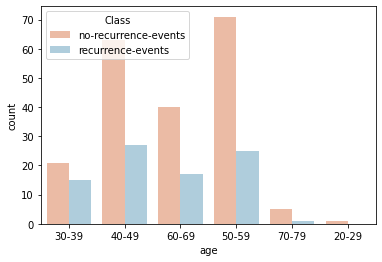

In [31]:

plt.figure()
sns.countplot(x='age', hue='Class', data=breast_cancer, palette='RdBu')
plt.show()

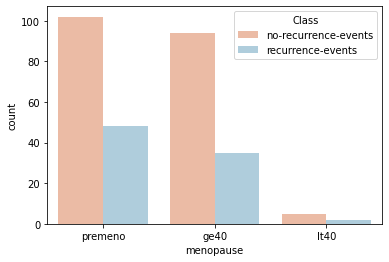

In [32]:

plt.figure()
sns.countplot(x='menopause', hue='Class', data=breast_cancer, palette='RdBu')
plt.show()

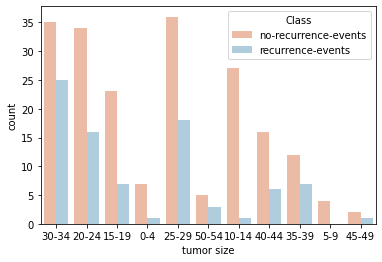

In [33]:

plt.figure()
sns.countplot(x='tumor size', hue='Class', data=breast_cancer, palette='RdBu')
plt.show()

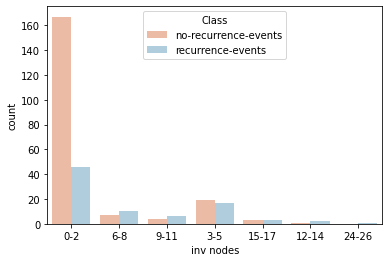

In [34]:

plt.figure()
sns.countplot(x='inv nodes', hue='Class', data=breast_cancer, palette='RdBu')
plt.show()

El atributo de edad muestra una alta no recurrencia para los rangos entre 30 y 69 años, mientras que el de inv nodes muestra que es muy probable que entre 0 y 2 no exista recurrencia, se trabaja con esas graficas dado que las de menopausia y tamaño del tumor tienen una distribuvion mas equitativa para ambos tipos de clase.



# Preprocesado de los datos

## Técnica de sustitución de valores faltantes 

Como se menciona previamente en la columna de node caps se encuentran valores faltantes, se sustituyen los "?" por  Nan y posteriormente se deciden eliminar

In [35]:
breast_cancer.replace(to_replace='?', value = np.nan, inplace = True)

In [36]:
pd.unique(breast_cancer['node caps'])

array(['no', 'yes', nan], dtype=object)

Notese que ahora efectivamente aparecen nan y no signos de ?

In [37]:
breast_cancer= breast_cancer.dropna()

In [38]:
pd.unique(breast_cancer['node caps'])

array(['no', 'yes'], dtype=object)

Aca se han eliminado los datos que presentaban nan

## One Hot encoding

Se procede a hacer el one hot encoding para todos los atributos de mas de 2 categorias, concatenandolos al set de datos para actualizarlo, se le llamará finaldataset

In [39]:
finaldataset=pd.get_dummies(breast_cancer, columns=['age']) 
finaldataset=pd.get_dummies(finaldataset, columns=['menopause'])  
finaldataset=pd.get_dummies(finaldataset, columns=['tumor size']) 
finaldataset=pd.get_dummies(finaldataset, columns=['inv nodes']) 
finaldataset=pd.get_dummies(finaldataset, columns=['breast quad']) 
finaldataset=pd.get_dummies(finaldataset, columns=['deg maling']) 


In [41]:
finaldataset

,Class,node caps,breast,irradiat,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,...,inv nodes_6-8,inv nodes_9-11,breast quad_central,breast quad_left_low,breast quad_left_up,breast quad_right_low,breast quad_right_up,deg maling_1,deg maling_2,deg maling_3
0,no-recurrence-events,no,left,no,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,no-recurrence-events,no,right,no,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,no-recurrence-events,no,left,no,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,no-recurrence-events,no,right,no,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,no-recurrence-events,no,right,no,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,no,left,no,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
282,recurrence-events,no,left,yes,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
283,recurrence-events,no,right,no,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
284,recurrence-events,no,left,no,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


Segón la vista preliminar mostrada, aun se deebe preprocesar las primeras 4 columnas, observese que dichas categorias son binarias 

## Categorias Binarias


In [42]:

finaldataset['Class'] = finaldataset['Class'].replace({'no-recurrence-events' : 0, 'recurrence-events' : 1})
finaldataset['node caps'] = finaldataset['node caps'].replace({'no' : 0, 'yes' : 1})
finaldataset['irradiat'] = finaldataset['irradiat'].replace({'no' : 0, 'yes' : 1}) 
finaldataset['breast'] = finaldataset['breast'].replace({'left' : 0, 'right' : 1})


In [43]:
finaldataset


,Class,node caps,breast,irradiat,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,...,inv nodes_6-8,inv nodes_9-11,breast quad_central,breast quad_left_low,breast quad_left_up,breast quad_right_low,breast quad_right_up,deg maling_1,deg maling_2,deg maling_3
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
282,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
283,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
284,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


Como se observa, ahora el finaldataset se puede considerar como un set de datos limpio.

# Aprendizaje Supervisado

## Separando datos para test y training

Se procede ya con la data lista a separar en test y training con una relacion 20%-80% respectivamente 
Para ello lo primero es definir los features y los labels, es importante mencionar que este tipo de problema es de clasificación , el output será si dadas ciertas condiciones la clase sera de una aparicion de cancer con recurrencia o no.

In [45]:
features = finaldataset.drop(['Class'], axis=1)
label = finaldataset['Class']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42) 


## Naive Bayes

Hay distintos tipos de aproximaciones de Naive Bayes (algoritmo que se basa en la probabilidad condicional) el tipo de datos que se tienen se correlaciona directamente con la efectividad del modelo obtenida, por ejemplo un caso de fit gaussiano no es recomendado dado que no se cuenta con datos numericos de forma gaussiana o con grandes dimensiones de datos, notese que los Scores obtenidos no llegan ni si quiera al 50 %

In [49]:
from sklearn.naive_bayes import GaussianNB
nbg = GaussianNB().fit(X_train, y_train)
print("Training set score: {:.3f}".format(nbg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(nbg.score(X_test, y_test)))

Training set score: 0.371
Test set score: 0.429


Un modelo multinominal resulta ser más efectivo, dado que es más efectivo para datos categoricos (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB) el score obtenido en ambos casos mejora considerablemente 

In [50]:
from sklearn.naive_bayes import MultinomialNB
nbm = MultinomialNB().fit(X_train, y_train)
print("Training set score: {:.3f}".format(nbm.score(X_train, y_train)))
print("Test set score: {:.3f}".format(nbm.score(X_test, y_test)))


Training set score: 0.792
Test set score: 0.696


El hiperparametro alpha del modelo conocido como parametro de suavizado, se puede ajustar obteniendo mejores resultados, se probaron varios parametros y en general alpha=0.3 es el que produce los resultados de score nmas alto y que no caen en overfitting dado que para el test y el score presentan la minima diferencia

In [71]:
from sklearn.naive_bayes import MultinomialNB
nbm = MultinomialNB(alpha=0.3).fit(X_train, y_train)
print("Training set score: {:.3f}".format(nbm.score(X_train, y_train)))
print("Test set score: {:.3f}".format(nbm.score(X_test, y_test)))


Training set score: 0.810
Test set score: 0.714


## Máquinas de Vector de soporte

Las maquinas de vector de soporte definen un limite de desicion para clasificar(lo cual es conveniente para el label class que es categorico), su algoritmo busca maximizar la distancia entre clases y a su vez minimizar la norma euclidiana

In [83]:

from sklearn.svm import SVC

svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.77
Accuracy on test set: 0.64


notese que el hiperarametro gamma se tiene como auto, la otra variante que posee ademas es scale,probando dicha variante se obtiene lo siguiente

In [84]:

from sklearn.svm import SVC

svc = SVC(gamma='scale')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.86
Accuracy on test set: 0.73


Se tiene una mejora notoria al cambiar el hiperparametro gamma, por otro lado el tipo de kernel utilizado por defecto es el rbf, sin embargo existen 4 variantes más(https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) al probarlas se obtienen algunos resultados que vale la pena destacar

In [85]:
from sklearn.svm import SVC

svc = SVC(gamma='scale',kernel='sigmoid')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.72
Accuracy on test set: 0.68


Primeramente para las variantes de kernel (exceptuando poly) no presenta mejoras en el score, en la celda anterior se muestra el caso de sigmoid, ahora bien el caso del Kernel polinomico se estudia por aparte 

In [86]:
from sklearn.svm import SVC

svc = SVC(gamma='scale',kernel='poly')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.91
Accuracy on test set: 0.73


se optiene una mejora notoria en el score del set de training,sin embargo, el test en comparacion tiene un performance mucho menor, posiblemente este sea un caso de overfitting, el kernel poly habilita otro hiperparametro llamado degree que se refiere al grado del polinomio utilizado para el ajuste, el valor por defecto es de 3, a continuacion se estudia como se comporta el modelo al variar dicho grado.  

In [90]:
from sklearn.svm import SVC

svc = SVC(gamma='scale',kernel='poly', degree=8)
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.98
Accuracy on test set: 0.59


In [91]:
from sklearn.svm import SVC

svc = SVC(gamma='scale',kernel='poly', degree=2)
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.87
Accuracy on test set: 0.75


Como es de esperarse al aumentar el grado del polinomio la tendencia hacia el overfiting es mas evidente, sin embargo al escoger un modelo de polinomio cuadratico (disminuir un grado respecto al default) se obtienen los mejores resultados hasta ahora para el conjunto de training y test.

## K nearest neighbors 

Los algotimos de KNN permiten establecer relaciones locales respecto a los vecinos cercanos k (hiperarametro del modelo que define cuantos vecinos considerar) y permite calsificar generando un limite de decisión, se procede entonces a hacer un barrido de valores k para encontrar graficamente un punto adecuado 

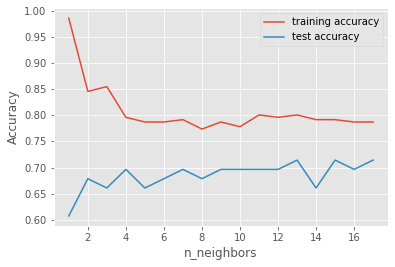

In [98]:
from sklearn.neighbors import KNeighborsClassifier 
training_accuracy = []
test_accuracy = [] 
plt.style.use('ggplot')
%matplotlib inline

neighbors_settings = range(1, 18)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Como se observa el valor de k =13 es el que genera la mejor precision para el test y ademas respecto al training no se observa un overfiting

In [101]:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=13)
    clf.fit(X_train, y_train)
    print("Training set score:")
    print(clf.score(X_train, y_train))
    print("Test set score:")
    print(clf.score(X_test, y_test))
  


Training set score:
0.8009049773755657
Test set score:
0.7142857142857143


## Métodos de ensamble 

su objetivo es mejorar el rendimiento de los modelos de ML al combinar distintas fuentes de modelos de aprendizaje supervisados y combinar la informacion obtenida de cada uno de estos modelos, en otras palabras el ensamblado permite conmbinar un conjunto de diversos modelos, promediando errores y produciendo en general mejores predicciones

Algunos ejemplos son: 

-Agregacion Boostrap o Bagging: donde se eligen al azar elementos del dataset y se subdivide en subsets se entrena cada uno de manera individual y luego el resultado es el conjunto de todos los submodelos. 

-Boosting:Es una tecnica de aprendizaje secuencial, se entrena un modelo con todo el conjunto de entrenamiento, para luego ir ajustando nuevos modelos basandose en el error residual.


Los métodos de ensamble usualmente se clasifican en dos tipos los de promedio que divide en subsets y luego toma un promedio de las predicciones como el primer ejemplo y en y los secuenciales que van cmodificando los subsets partiendo del inicial como el segundo ejemplo. 



## AdaBoost Classifier 

El AdaBoost como su nombre lo indica es un metodo de ensamble tipo boosting que para cada iteracion de la secuencia le da más enfásis a los casos que han presentado mayor dificultad (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier)
corriendo el algoritmo se obtiene:

In [135]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
clf = AdaBoostClassifier()
clf.fit(X_train, y_train) 
print("Training set score:")
print(clf.score(X_train, y_train))
print("Test set score:")
print(clf.score(X_test, y_test))
  

Training set score:
0.7782805429864253
Test set score:
0.6785714285714286


Ahora variando los hiperparametros se pueden mejorar los resultados de score, cabe mencionar que el hiperparametro de algorithm mejora el rendimiento al pasar de SAMME.R a SAMME dado qwue la data con la que se esta trabajando es discreta 

In [134]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
clf = AdaBoostClassifier(n_estimators=20, random_state=None, algorithm='SAMME')
clf.fit(X_train, y_train) 
print("Training set score:")
print(clf.score(X_train, y_train))
print("Test set score:")
print(clf.score(X_test, y_test))
  

Training set score:
0.7918552036199095
Test set score:
0.7142857142857143


# Conclusiones

A modo de resumen se preprocesaron los datos con one hot y clasificacion binario, el conjunto de datos era en general categorico y el problema era de tipo clasificatorio, se obtuvo el mejor resultado al utilizar el modelo de aprendizaje supervisado de maquina de vector de soporte con kernel polinomico de segundo grado para valores de Accuracy on training set: 0.87 y
Accuracy on test set: 0.75 

Con respecto al método de ensamble AdaBoost se logro encontrar parametros para obtener scores aceptables en comparación con los obtenidos en los metodos individuales, sin embargo se sugiere para futuros estudios estudios intentar implementar otros metodos de ensamble para mejorar los resultados.